In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import IPython
from low_rank_fine_tuned import *
import IPython

In [2]:
def test(W):
    Win = np.loadtxt(open("data/first_weight.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    Wtest = W
    Wout = np.loadtxt(open("data/last_weight.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    Bin = np.loadtxt(open("data/first_bias.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    Btest = np.loadtxt(open("data/Bias.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    Bout = np.loadtxt(open("data/last_bias.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)

    train_x = np.loadtxt(open("data/train_x.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    train_y = np.loadtxt(open("data/train_y.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    test_x = np.loadtxt(open("data/test_x.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
    test_y = np.loadtxt(open("data/test_y.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)

    #train set
    temp11_train = np.matmul(train_x, Win)
    temp12_train = temp11_train + Bin
    temp13_train = np.maximum(temp12_train, 0)

    temp21_train = np.matmul(temp13_train, Wtest)
    temp22_train = temp21_train + Btest
    temp23_train = np.maximum(temp22_train, 0)

    temp31_train = np.matmul(temp23_train, Wout)
    temp32_train = temp31_train + Bout
    output_train = np.argmax(temp32_train, 1)


    correctoutput_train = np.argmax(train_y, 1)
    train_result = np.equal(output_train, correctoutput_train)

    # test set
    temp11_test = np.matmul(test_x, Win)
    temp12_test = temp11_test + Bin
    temp13_test = np.maximum(temp12_test, 0)

    temp21_test = np.matmul(temp13_test, Wtest)
    temp22_test = temp21_test + Btest
    temp23_test = np.maximum(temp22_test, 0)

    temp31_test = np.matmul(temp23_test, Wout)
    temp32_test = temp31_test + Bout
    output_test = np.argmax(temp32_test, 1)

    correctoutput_test = np.argmax(test_y, 1)
    test_result = np.equal(output_test, correctoutput_test)
    
    return sum(train_result)/len(train_result) , sum(test_result)/len(test_result)

    
def get_rank(W, thr):
    [Utemp,S,V] = np.linalg.svd(W)
    rank = np.count_nonzero(S > thr)
    return rank
    


In [3]:
X = np.loadtxt(open("data/train_x.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
Y = np.loadtxt(open("data/train_y.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
W1 = np.loadtxt(open("data/first_weight.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
W2 = np.loadtxt(open("data/Weight.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
W3 = np.loadtxt(open("data/last_weight.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
b1 = np.loadtxt(open("data/first_bias.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
#b1 = b1.reshape(b1.shape[0],1)
b2 = np.loadtxt(open("data/Bias.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
#b2 = b2.reshape(b2.shape[0],1)
b3 = np.loadtxt(open("data/last_bias.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)

In [4]:
orig_train_Acc, orig_test_acc = test(W2)
# total number of parameters
orig_size = 2*80 + 80*80 + 2*80 + 80 + 80 + 2

In [5]:
#LR_files = ["data/Low_rank_N_100_Eps_100.txt", "data/Low_rank_N_100_Eps_100.txt", "data/Low_rank_N_100_Eps_50.txt", "data/Low_rank_N_100_Eps_20.txt", "data/Low_rank_N_100_Eps_10.txt", "data/Low_rank_N_100_Eps_1.txt", "data/Low_rank_N_100_Eps_01.txt","data/Low_rank_N_100_Eps_001.txt", "data/Low_rank_N_100_Eps_0001.txt", "data/Low_rank_N_100_Eps_0001.txt", "data/Low_rank_N_100_Eps_1e-05.txt", "data/Low_rank_N_100_Eps_1e-10.txt", "data/Low_rank_N_100_Eps_1e-15.txt", "data/Low_rank_N_100_Eps_00.txt"]
LR_files = ["data/Low_rank_N_200_Eps_200.txt", "data/Low_rank_N_200_Eps_100.txt", "data/Low_rank_N_200_Eps_50.txt", "data/Low_rank_N_200_Eps_20.txt", "data/Low_rank_N_200_Eps_10.txt", "data/Low_rank_N_200_Eps_1.txt","data/Low_rank_N_200_Eps_001.txt", "data/Low_rank_N_200_Eps_0001.txt", "data/Low_rank_N_200_Eps_00001.txt","data/Low_rank_N_200_Eps_1e-05.txt","data/Low_rank_N_200_Eps_1e-10.txt","data/Low_rank_N_200_Eps_1e-15.txt","data/Low_rank_N_200_Eps_00.txt"]
LR_test_acc = []
LR_train_acc = []
LR_Rank = []
LR_size = []
LR_valid_file = []
for file in LR_files:
    W=np.loadtxt(open(file, "rb"), dtype='float32', delimiter=",", skiprows=0)
    train_acc, test_acc = test(W)
    rank = get_rank(W, 0.001)
    
    if rank not in LR_Rank:
        LR_test_acc.append(test_acc)
        LR_train_acc.append(train_acc)
        LR_Rank.append(rank)
        LR_size.append(2*80 + 160*rank + 2*80 + 80 + 80 + 2)
        LR_valid_file.append(file)
#     else:
#         IPython.embed()
#         idx = LR_Rank.index(rank)
#         if LR_train_acc[idx] < train_acc:
#             LR_train_acc[idx] = train_acc
#             LR_test_acc[idx] = test_acc
#             LR_valid_file.append(file)

In [6]:
LR_Rank

[7, 8, 10, 13, 16, 20, 22]

In [7]:
LR_FT_test_acc_total = []
LR_FT_train_acc_total = []
LR_FT_Rank_total = []
LR_FT_size_total = []


N = 100
Epochs = [5,10,15,20]

for epochs in Epochs:
    LR_FT_test_acc = []
    LR_FT_train_acc = []
    #LR_FT_Rank = []
    LR_FT_size = []

    cnt = 0
    for file in LR_valid_file:
        print(file)
        W = np.loadtxt(file, dtype='float32', delimiter=",", skiprows=0)
        rank = get_rank(W, 0.001)
        train_acc, test_acc = fine_tune(N, file, epochs, rank)
        print(rank)
        cnt += 1


        LR_FT_test_acc.append(test_acc)
        LR_FT_train_acc.append(train_acc)
        LR_FT_size.append(2*80 + 160*rank + 2*80 + 80 + 80 + 2)
    
       
    LR_FT_test_acc_total.append(LR_FT_test_acc)
    LR_FT_train_acc_total.append(LR_FT_train_acc)
    #LR_FT_Rank_total.append()
    #LR_FT_size_total.append()


data/Low_rank_N_200_Eps_200.txt




7
data/Low_rank_N_200_Eps_100.txt
8
data/Low_rank_N_200_Eps_50.txt
10
data/Low_rank_N_200_Eps_20.txt
13
data/Low_rank_N_200_Eps_10.txt
16
data/Low_rank_N_200_Eps_1.txt
20
data/Low_rank_N_200_Eps_001.txt
22
data/Low_rank_N_200_Eps_200.txt
7
data/Low_rank_N_200_Eps_100.txt
8
data/Low_rank_N_200_Eps_50.txt
10
data/Low_rank_N_200_Eps_20.txt
13
data/Low_rank_N_200_Eps_10.txt
16
data/Low_rank_N_200_Eps_1.txt
20
data/Low_rank_N_200_Eps_001.txt
22
data/Low_rank_N_200_Eps_200.txt
7
data/Low_rank_N_200_Eps_100.txt
8
data/Low_rank_N_200_Eps_50.txt
10
data/Low_rank_N_200_Eps_20.txt
13
data/Low_rank_N_200_Eps_10.txt
16
data/Low_rank_N_200_Eps_1.txt
20
data/Low_rank_N_200_Eps_001.txt
22
data/Low_rank_N_200_Eps_200.txt
7
data/Low_rank_N_200_Eps_100.txt
8
data/Low_rank_N_200_Eps_50.txt
10
data/Low_rank_N_200_Eps_20.txt
13
data/Low_rank_N_200_Eps_10.txt
16
data/Low_rank_N_200_Eps_1.txt
20
data/Low_rank_N_200_Eps_001.txt
22


In [8]:
W = np.loadtxt(open("data/Weight.txt", "rb"), dtype='float32', delimiter=",", skiprows=0)
NLR_test_acc = []
NLR_train_acc = [] 
NLR_Rank = [7, 8, 10, 11, 16, 21, 23]
NLR_size = [2*80 + 160*rank + 2*80 + 80 + 80 + 2 for rank in LR_Rank]
[U,S,Vt] = np.linalg.svd(W)

for rank in LR_Rank:
    W_hat = np.dot(U[:,:rank]*S[:rank], Vt[:rank,:])
    train_acc, test_acc = test(W_hat)
    NLR_test_acc.append(test_acc)
    NLR_train_acc.append(train_acc)
    #W_NLR = {'W1':W1, 'W2':W_hat, 'W3':W3}
    #b_NLR = {'b1':b1, 'b2':b2, 'b3':b3}
    #plot_boundaries(X, W_NLR, b_NLR, True,'plot_boundary_NLR_rank_'+str(rank), 'Low Rank = '+str(rank))

In [9]:
NLR_size

[1602, 1762, 2082, 2562, 3042, 3682, 4002]

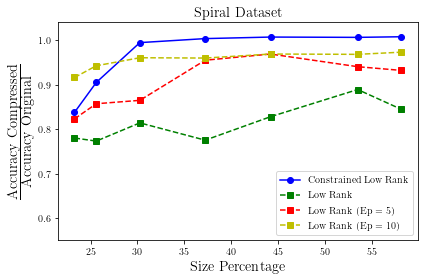

In [10]:
plt.rcParams.update({
    "text.usetex": True})

NLR_test_acc = np.array(NLR_test_acc)
NLR_size = np.array(NLR_size)
LR_test_acc = np.array(LR_test_acc)
LR_size = np.array(LR_size)
# LDR_test_acc = np.array(LDR_test_acc)
# LDR_size = np.array(LDR_size)

# plt.plot(LDR_size*100/orig_size, LDR_test_acc/orig_test_acc,'r-*')

plt.plot(LR_size*100/orig_size, LR_test_acc/orig_test_acc,'b-o', label=r'\textrm{Constrained Low Rank}')
plt.plot(NLR_size*100/orig_size, NLR_test_acc/orig_test_acc,'g--s', label=r'\textrm{Low Rank}')

plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[0]/orig_test_acc,'r--s', label=r'\textrm{Low Rank (Ep = 5)}')
plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[1]/orig_test_acc,'y--s', label=r'\textrm{Low Rank (Ep = 10)}')
# plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[2]/orig_test_acc,'c--s', label=r'\textrm{Low Rank (Ep = 15))}')
# plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[3]/orig_test_acc,'k--s', label=r'\textrm{Low Rank (Ep = 20))}')


plt.xlabel(r'$\textrm{Size Percentage}$', fontsize='x-large')
plt.ylabel(r'$\frac{\textrm{Accuracy Compressed}}{\textrm{Accuracy Original}}$',fontsize='x-large') 
plt.legend(loc=4)

plt.title(r'\textrm{Spiral Dataset}', fontsize='x-large')
plt.autoscale()
plt.ylim([0.55, 1.04])
plt.tight_layout()
plt.savefig('Spiral_N_200_Compression_plot_FT')

In [6]:
Net_trim_files = ['data/Net_trim_N_200_Eps_00.txt','data/Net_trim_N_200_Eps_1.txt','data/Net_trim_N_200_Eps_001.txt','data/Net_trim_N_200_Eps_00001.txt','data/Net_trim_N_200_Eps_1e-05.txt','data/Net_trim_N_200_Eps_1e-10.txt','data/Net_trim_N_200_Eps_1e-15.txt']


In [7]:
for file in Net_trim_files:
    W=np.loadtxt(open(file, "rb"), dtype='float32', delimiter=",", skiprows=0)
    nnz = np.count_nonzero(W>0.000001)
    print(nnz)

3144
1847
2216
3137
3143
3144
3144
